# Comparisons, Masks, and Boolean Logic
- **Note: This lecture is from Jake VanderPlas' [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html)**

## Using boolean masks within NumPy arrays


In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('https://drive.google.com/uc?id=1cMEKkjIYRj6OSge7GnD2SR_ceX_z7ZJf')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [2]:
rainfall

array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43, 213,  15,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,  89, 216,   0,  23,  20,   0,   0,   0,   0,   0,   0,  51,
         5, 183, 170,  46,  18,  94, 117, 264, 145, 152,  10,  30,  28,
        25,  61, 130,   3,   0,   0,   0,   5, 191, 107, 165, 467,  30,
         0, 323,  43, 188,   0,   0,   5,  69,  81, 277,   3,   0,   5,
         0,   0,   0,   0,   0,  41,  36,   3, 221, 140,   0,   0,   0,
         0,  25,   0,  46,   0,   0,  46,   0,   0,   0,   0,   0,   0,
         5, 109, 185,   0, 137,   0,  51, 142,  89, 124,   0,  33,  69,
         0,   0,   0,   0,   0, 333, 160,  51,   0,   0, 137,  20,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
         0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  64,   0,   5,  36,  13,   0,
         8,   3,   0,   0,   0,   0,   0,   0,  18,  23,   0,   

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

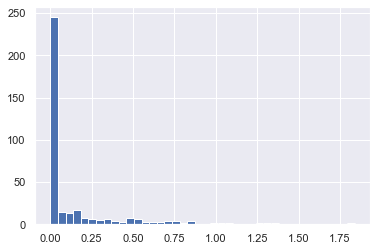

In [4]:
plt.hist(inches, 40)

## Using NumPy's comparison operators.
- The result of the comparison operators is a Boolean array. 
- For more info, refere to the [reference](https://docs.scipy.org/doc/numpy/reference/routines.logic.html)

In [5]:
x = np.array([1, 2, 3, 4, 5])

In [6]:
x < 3 

array([ True,  True, False, False, False])

In [7]:
x > 3

array([False, False, False,  True,  True])

In [8]:
x <= 3

array([ True,  True,  True, False, False])

In [9]:
x >= 3

array([False, False,  True,  True,  True])

In [10]:
x != 3

array([ True,  True, False,  True,  True])

In [11]:
x == 3

array([False, False,  True, False, False])

In [12]:
type(x == 3)

numpy.ndarray

In [13]:
(x == 3).dtype

dtype('bool')

## Element-wise comparison of two arrays

In [14]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

A summary of the comparison operators and their equivalent ufunc:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

In [15]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [16]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays
Complete reference of functions can be found [here](https://docs.scipy.org/doc/numpy/reference/routines.sort.html).

### Counting entries

In [17]:
np.count_nonzero(x < 6)

8

Note: 
```
The word “non-zero” is in reference to the Python 2.x built-in method __nonzero__() (renamed __bool__() in Python 3.x) of Python objects that tests an object’s “truthfulness”. For example, any number is considered truthful if it is nonzero, whereas any string is considered truthful if it is not the empty string. Thus, this function (recursively) counts how many elements in a (and in sub-arrays thereof) have their __nonzero__() or __bool__() method evaluated to True.
```

For more info, refer [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.count_nonzero.html#numpy.count_nonzero).

``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``.

In [18]:
np.sum(x < 6)

8

```axis``` argument can be specified to do summation along rows or columsn. 

In [19]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

Count the number of elements in each row less than 6.

In [20]:
np.sum( x < 6, axis=1)

array([4, 2, 2])

Use ```np.any``` to check if any value is true.  

In [21]:
np.any(x > 8)

True

In [22]:
np.any(x < 0)

False

Use ```np.all``` to check if all the values are true.

In [23]:
np.all(x < 10)

True

In [24]:
np.all(x == 6)

False

In [25]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

```np.all``` and ```np.any``` can be used along particular axes. 

In [26]:
np.all(x < 8, axis = 0)

array([ True, False,  True,  True])

In [27]:
np.all(x < 8, axis = 1)

array([ True, False,  True])

Note: Python's built-in ```sum()```, ```any()``` and ```all()``` functions will produce unintended results when used on multidimensional arrays. Remember to **always** use ```np.sum()```, ```np.array()``` and ```np.all()```. 

## Using NumPy's logical operations

NumPy [overloads](https://realpython.com/operator-function-overloading/#overloading-built-in-operators) Python's bitwise ``logic operators (&, |, ^ and ~)`` to allow combining of logic operations. 

E.g. "*Get the list of all days with greater than 0.5 inch and less than one inch of rain.*"

In [28]:
inches

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134,
       0.83858268, 0.05905512, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01968504, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3503937 , 0.8503937 , 0.        ,
       0.09055118, 0.07874016, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2007874 , 0.01968504,
       0.72047244, 0.66929134, 0.18110236, 0.07086614, 0.37007874,
       0.46062992, 1.03937008, 0.57086614, 0.5984252 , 0.03937008,
       0.11811024, 0.11023622, 0.0984252 , 0.24015748, 0.51181102,
       0.01181102, 0.        , 0.        , 0.        , 0.01968504,
       0.7519685 , 0.42125984, 0.6496063 , 1.83858268, 0.11811024,
       0.        , 1.27165354, 0.16929134, 0.74015748, 0.        ,
       0.        , 0.01968504, 0.27165354, 0.31889764, 1.09055

In [29]:
np.sum((inches > 0.5) & (inches < 1))

29

There are 29 days with rainfall between 0.5 and 1.0 inches.  
Note, the parenthesis are important because of the [operator precedence rules](https://www.programiz.com/python-programming/precedence-associativity).

*A AND B* equals *NOT (A OR B)*

In [30]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

Bitwise Boolean operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

Answering 2014 Seattle weather questions

In [31]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Boolean Arrays as Masks

In [32]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

We can use a Boolean array as a mask to select subset of the data from an array holding values. 

In [33]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [34]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

Above example returns values from array x that has corresponding position with the value of ``True`` from the array returned by ``x < 5`` expression

Computing relevant stats on Seattle rain data.

In [35]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


>"By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset."

## Keywords 'and'/'or' vs. '&'/'|'

### `and` and `or`
- In Python, keywords ``and`` and ``or`` perform a single Boolean operation on entire object.
- In NumPy, ``and`` and ``or`` operations return 'not a well-defined value'.
>ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [36]:
bool(42), bool(0)

(True, False)

In [37]:
bool(42 and 0)

False

In [38]:
bool(42 or 0)

True

In [39]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)

In [40]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
A and B

### `&` and `|`
- In Python, `&` and `|` are bit-wise operations.
- In NumPy, each element in the array is treated as a string of bits where `1 = True` and `0 = False`. 

In [ ]:
print(bin(42))
print(bin(59))
print('&: ' + bin(42 & 59))
print('|: ' + bin(42 | 59))

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
print(A & B)
print(A | B)

# Fancy Indexing

For fancy indexing, we pass an array of indices to access multiple array elements at once. 

In [ ]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

Manually accessing array elements

In [ ]:
[x[3], x[7], x[2]]

Using fancy indexing

In [ ]:
ind = [3, 7, 4]
x[ind]

Note:
>**When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*.**

In [ ]:
x

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

Fancy indexing can also work with multidimensional array.

In [ ]:
X = np.arange(12).reshape((3, 4))
X

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

The first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.  
The pairing of indices in fancy indexing follows all the broadcasting rules

In [ ]:
X[row[:, np.newaxis], col]

Let's unpack it. 

In [ ]:
row[:, np.newaxis] # Reshaping the row index array

In [ ]:
[row[:, np.newaxis], col]

This is a familiar broadcasting functionality of NumPy.

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

 Each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations.

In [ ]:
row[:, np.newaxis] * col

## Combined Indexing

Fancy indexing can be combined wiht other indexing schemes.

In [ ]:
print(X)

In [ ]:
X[2, [2, 0, 1]]

In [ ]:
X[1:, [2, 0, 1]]

Combining fancy indexing with masking:

In [ ]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

# Sorting Arrays

### Selection Sort

[np.argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) returns the indices of the minimum values along an axis.

Note: As leared in lecture #, selection sort is easy to understand and implement. However, it is not an efficient algorithm. 

In [ ]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [ ]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

### Bogosort
Bogosort works by pure chances. 

In [ ]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [ ]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

Let's unpack

In [ ]:
x = np.array([2, 1, 4, 3, 5])

In [ ]:
x[:-1]

In [ ]:
x[1:]

In [ ]:
x[:-1] > x[1:]

## ``np.sort`` and ``np.argsort``

- By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm
- *mergesort* and *heapsort* are also available.

In general, deefault *quicksort* is most efficient

Returning a sorted version of the array:

In [ ]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

In [ ]:
x

To sort the array in-place, use the ``sort`` NumPy array method.

In [ ]:
x.sort()
print(x)

In [ ]:
x

``argsort`` returns the *indices* of the sorted elements.

In [ ]:
x = np.array([2, 1, 4, 3, 5])
sorted_indices = np.argsort(x) # First element is the index of the smallest value
print(sorted_indices)

Constructing a sorted array using sorted indices.

In [ ]:
x[sorted_indices]

### Sorting along rows or columns

Use ``axis`` argument to sort NumPy arrays along rows or columns.

In [ ]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

In [ ]:
# sort each column of X
np.sort(X, axis=0)

In [ ]:
# sort each row of X
np.sort(X, axis=1)

Note: 
>This treats each row or column as an independent array, and any relationships between the row or column values will be lost!

### Partitioning
Finding *K* smallest values with ``np.partition``
- ``np.partition`` takes an array and a number *K*.
- Returns a new array with the smallest *K* values to the left of the partition and remaining values to the right. 
- The results on both spectrums are in arbitrary order. 

In [ ]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

#### Partitioning along an axis of a multidimensional array.

In [ ]:
np.partition(X, 2, axis=1)

``np.argpartition`` can be used to get the indices of the partition. 

In [ ]:
np.argpartition(X, 2, axis=1)

## Structured Data
NumPy's *structured arrays* and *record arrays* provide efficient storage for heterogeneous data. 

Structured arrays are arrays with compound data types - providing a single structure to store all related data (e.g. name, age, weight)

In [ ]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

Using compound data type specification to create a structured array.

In [ ]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

In [ ]:
data

- ``'U10'``: Unicode string of maximum length of 10
- ``'i4'``: 4-byte (32-bit) integer
- ``'f8'``: 8-byte (64-bit) float

In [ ]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

### Referencing values in structured array

Values in structured arrays can be referenced by using index and name.

In [ ]:
data

In [ ]:
# Get all names
data['name']

In [ ]:
# Get first row of data
data[0]

In [ ]:
data[-1]['name']

### Filtering data in structured arrays

In [ ]:
# Get names where age is under 30
data[data['age'] < 30]['name']

## Creating Structured Arrays

### Using the dictionary methods

In [ ]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

> For clarity, numerical types can be specified using Python types or NumPy ``dtype``s instead:

In [ ]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

### Using a list of tuples

In [ ]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

Names of the types are optional and they can be skipped. 

In [ ]:
np.dtype('S10,i4,f8')

### Short-hand string type specifier
- If the first character is either ``<`` or ``>``, they denote "little endian"" or "big endian"" respectively specifying the ordering convention for significant bits. 
- The next character specifies the type of data
- The last character is the size of the object in bytes. 

| Character        | Description           | Example                             |
| ---------        | -----------           | -------                             | 
| ``'b'``          | Byte                  | ``np.dtype('b')``                   |
| ``'i'``          | Signed integer        | ``np.dtype('i4') == np.int32``      |
| ``'u'``          | Unsigned integer      | ``np.dtype('u1') == np.uint8``      |
| ``'f'``          | Floating point        | ``np.dtype('f8') == np.int64``      |
| ``'c'``          | Complex floating point| ``np.dtype('c16') == np.complex128``|
| ``'S'``, ``'a'`` | String                | ``np.dtype('S5')``                  |
| ``'U'``          | Unicode string        | ``np.dtype('U') == np.str_``        |
| ``'V'``          | Raw data (void)       | ``np.dtype('V') == np.void``        |

### More Advanced Compount Types

In [ ]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

``mat`` component consists of a 3 x 3 floating-point matrix. 

Advantage of using an advanced compound type: ``dtype`` maps onto a C structure definitely. 

## RecordArrays

NumPy's ``np.recarray`` is similar to the structured array. It provides an ability to reference fields using attributes rather as dictionary keys.  

Note: There is a performance overhead of using NumPy record arrays. 

In [ ]:
data['age']

In [ ]:
data_rec = data.view(np.recarray) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.view.html
data_rec.age

In [ ]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

For more information on NumPy structured view, refer [here](https://docs.scipy.org/doc/numpy/user/basics.rec.html).